In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
%matplotlib notebook

In [3]:
Delta = 0.01
delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)

kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(Delta=Delta, delta=delta, twobytwo=True)
Omega2, Mu2 = berry_mu(Kx2, Ky2, E2, Psi2)

<IPython.core.display.Javascript object>


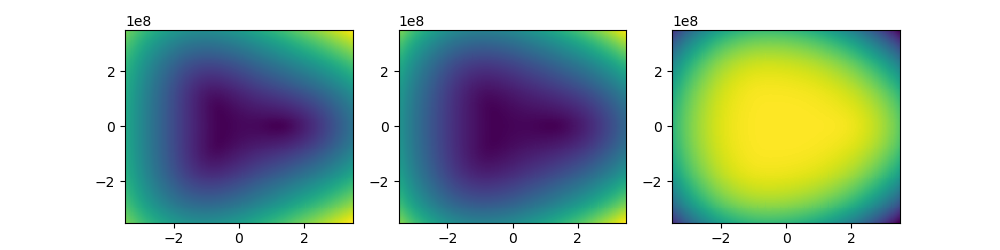

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(10,2.5))
ax[0].pcolormesh(Kx, Ky, E[2])
ax[1].pcolormesh(Kx, Ky, E2[1])
ax[2].pcolormesh(Kx, Ky, E[2]- E2[1])

In [6]:
from blg_strain.utils.const import eta0, a, nu, gamma1

<IPython.core.display.Javascript object>


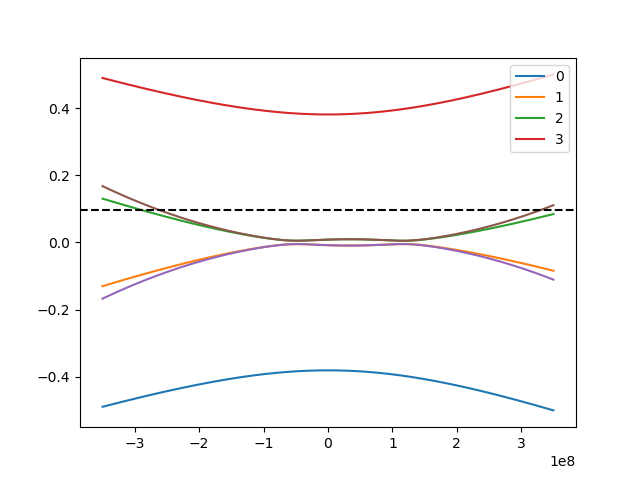

In [7]:
j = 100
fig, ax = plt.subplots()

kshift = eta0 / a * (1+nu) * delta / 2

for n in range(4):
    ax.plot(Kx[:, j], E[n][:,j], label=n)
for n in range(2):
    ax.plot(Kx[:, j], E2[n][:,j])

ax.axhline(gamma1/4, ls='--', color='k')
    
plt.legend()

# Try Berry curvature dipole

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
from blg_strain.utils.const import hbar, v3, meff
kL = meff * v3 / hbar  # m^-1
EL = hbar * kL * v3 / 2

In [3]:
from blg_strain.utils.params import w
w(1, 3, 1, 0).real / EL  # Value of w3 (in EL) for 100% strain

482.4114365934521

In [4]:
wEL = 5
delta = wEL / (w(1,3,1,0).real / EL)  # delta corresponding to value of wEL
delta

0.010364596733666796

In [5]:
wELs = np.array([1,3,5])
deltas = wELs/ (w(1,3,1,0).real / EL)

# 2x2

In [6]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)

Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)

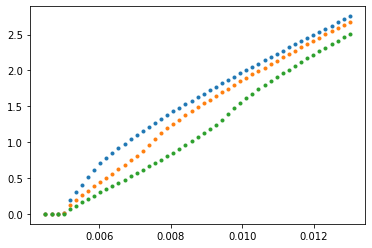

In [7]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

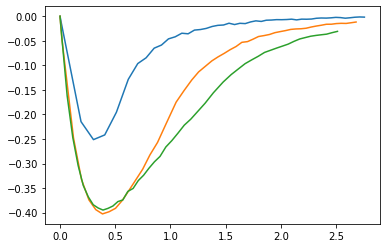

In [8]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
    ax.plot(ntot / kL ** 2, D * kL)

# 4x4

In [15]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)


D44s = []
ntot44s = []

for delta in deltas:

    # K
    kx44, ky44, Kx44, Ky44, E44, Psi44 = get_bands(Delta=Delta, delta=delta, twobytwo=False)
    Omega44, Mu44 = berry_mu(Kx44, Ky44, E44, Psi44)
    splE44, splO44, splM44 = get_splines(kx44, ky44, E44, Omega44, Mu44)
    kx244, ky244, E244, Omega244, Mu244 = densify(kx44, ky44, splE44, splO44, splM44)
    
    ntot44 = np.empty_like(EFs)
    D44 = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f44 = feq_func(E244, EF, T=T)
        ntot44[i] = n_valley(kx244, ky244, f44, EF, T=T)
        D44[i] = D_valley(kx244, ky244, f44, splO44)[2]
    
    D44s.append(D44)
    ntot44s.append(ntot44)

<IPython.core.display.Javascript object>


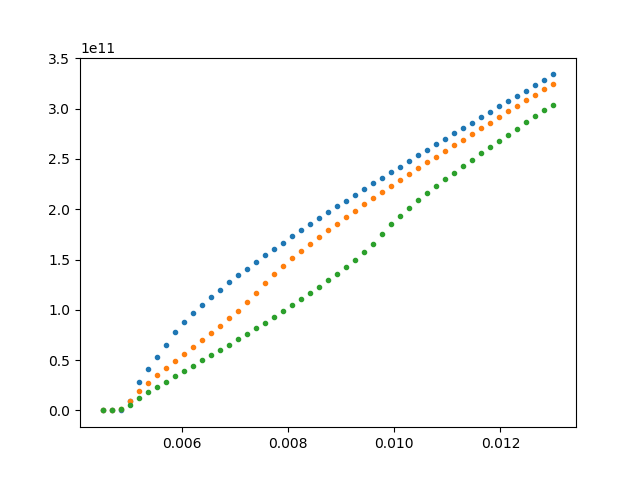

In [16]:
fig, ax = plt.subplots()
for ntot44 in ntot44s:
    ax.plot(EFs, ntot44/1e4, '.')

<IPython.core.display.Javascript object>


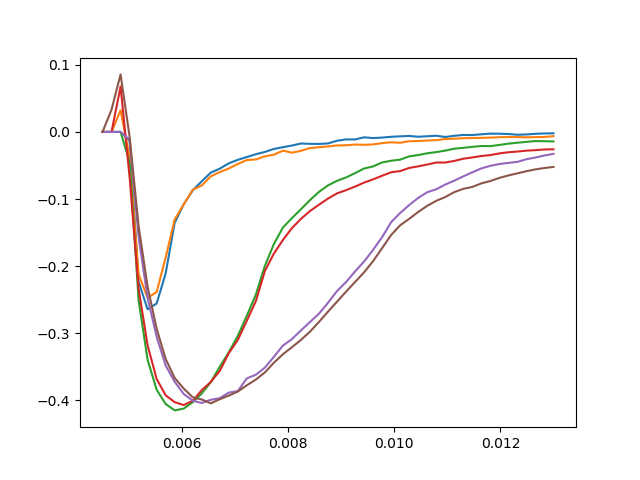

In [32]:
fig, ax = plt.subplots()

# for ntot, ntot44, D, D44 in zip(ntots, ntot44s, Ds, D44s):
#     ax.plot(ntot / kL ** 2, D * kL)
#     ax.plot(ntot44 / kL ** 2, D44 * kL)
    
    
for ntot, ntot44, D, D44 in zip(ntots, ntot44s, Ds, D44s):
    ax.plot(EFs, D * kL)
    ax.plot(EFs, D44 * kL)

# Plot bands

In [12]:
E2.shape

(2, 1000, 1000)

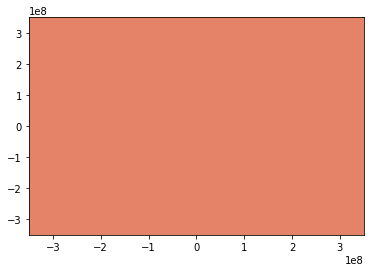

In [14]:
berry = Omega2[1].T * feq_func(E2[1].T, 0.006)

fig, ax = plt.subplots()
ax.contourf(kx2, ky2, berry, cmap='RdBu')#, vmin=-83/kL**2, vmax=0)

NameError: name 'kx244' is not defined

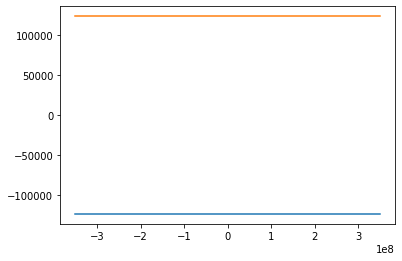

In [16]:
fig, ax = plt.subplots()

for n in range(2):
    ax.plot(kx2, E2[n][:, 500])

for n in range(4):
    ax.plot(kx244, E244[n][:, 500])

# ax.set_ylim(-0.03, 0.03)
ax.set_xlim(-2.3e8, 3e8)
# ax.plot(ky2, E2[1][350, :])
# ax.plot(ky244, E244[2][350, :])

In [29]:
EF = 0.1
f44 = feq_func(E244, EF, T=T)
n_valley(kx244, ky244, f44, EF, T=T)/1e12/1e4

F-D dist in band 2 not smaller than 0.010000 at boundaries!


3.344479798948874

# Why was dipole noisy? Would more points help? Answer: yes!

In [82]:
def recipspace(start, stop, num, shift=0):
    '''
    Returns an array of num values from start to stop whose reciprocals are linearly spaced.
    This 
    '''
    return 1/np.linspace(1/start, 1/stop, num)

<IPython.core.display.Javascript object>


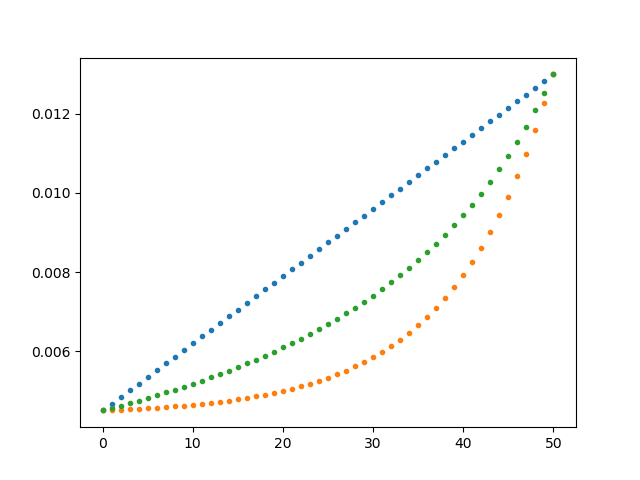

In [108]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.0045, 0.013, 51), '.')
ax.plot(np.geomspace(0.0045-.0044, 0.013-.0044, 51)+.0044, '.')
ax.plot(recipspace(0.0045, 0.013, 51), '.')

In [123]:
Delta = 0.01
# EFs = np.linspace(0.0045, 0.013, 51)
# EFs = recipspace(0.0045, 0.013, 51)
EFs = np.geomspace(0.005-.0049, 0.013-.0049, 51)+.0049


Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM, Nkx_new=2000, Nky_new=2000)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f, EF, T=T)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)
# np.savez('2x2_smooth_berry_dipole.npz', deltas=deltas, ntots=ntots, Ds=Ds)

In [137]:
data = np.load('2x2_smooth_berry_dipole.npz')
deltas, ntots, Ds = data['deltas'], data['ntots'], data['Ds']

<IPython.core.display.Javascript object>


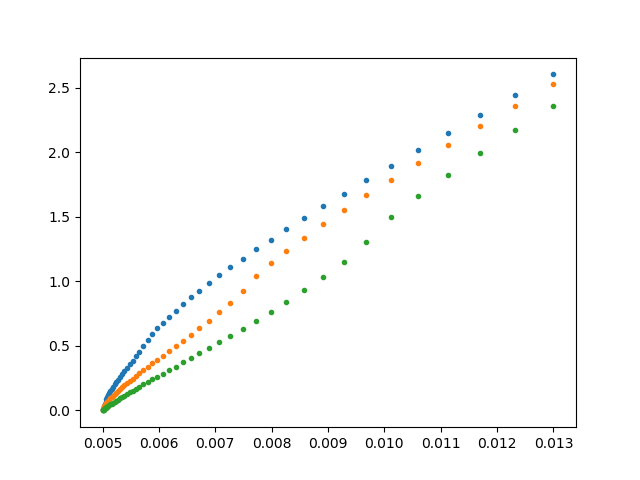

In [138]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

In [194]:
ntot

array([0.00000000e+00, 4.12485636e+12, 8.49819805e+12, 1.29709339e+13,
       1.82885198e+13, 2.35067116e+13, 2.91224799e+13, 3.50612791e+13,
       4.21182623e+13, 4.91503969e+13, 5.63813198e+13, 6.40843648e+13,
       7.36758983e+13, 8.25716729e+13, 9.20638122e+13, 1.03245652e+14,
       1.14725674e+14, 1.27125091e+14, 1.40369359e+14, 1.54905750e+14,
       1.70386386e+14, 1.86935509e+14, 2.05074937e+14, 2.24705278e+14,
       2.45876227e+14, 2.68587786e+14, 2.93287227e+14, 3.20421824e+14,
       3.49519456e+14, 3.81872245e+14, 4.16287462e+14, 4.54777838e+14,
       4.95852462e+14, 5.41722853e+14, 5.92215071e+14, 6.47652146e+14,
       7.08704990e+14, 7.76566332e+14, 8.52130719e+14, 9.36938759e+14,
       1.03188500e+15, 1.14082097e+15, 1.26469090e+15, 1.41114815e+15,
       1.59266668e+15, 1.83056653e+15, 2.03467237e+15, 2.23746124e+15,
       2.44397740e+15, 2.65906629e+15, 2.88558551e+15])

In [207]:
D*1e9

array([  0.        ,  -0.33284917,  -0.659538  ,  -0.95208036,
        -1.32804503,  -1.6724478 ,  -2.0711597 ,  -2.44754948,
        -2.87764747,  -3.28936938,  -3.70080844,  -4.13381481,
        -4.6369335 ,  -5.09952107,  -5.56821987,  -6.03423601,
        -6.50767409,  -6.98077067,  -7.46901366,  -7.94543122,
        -8.46218121,  -8.83247324,  -9.30401577,  -9.69674695,
       -10.05443906, -10.4272929 , -10.73709103, -11.01769159,
       -11.21743009, -11.37777399, -11.47965576, -11.47361152,
       -11.46522982, -11.35575754, -11.144926  , -10.89131115,
       -10.51344564, -10.10843622,  -9.60662647,  -9.03063091,
        -8.37860382,  -7.66319822,  -6.83474277,  -5.93925674,
        -4.83594173,  -3.42544415,  -2.60624605,  -2.00467942,
        -1.57631627,  -1.23934457,  -0.94899101])

<IPython.core.display.Javascript object>


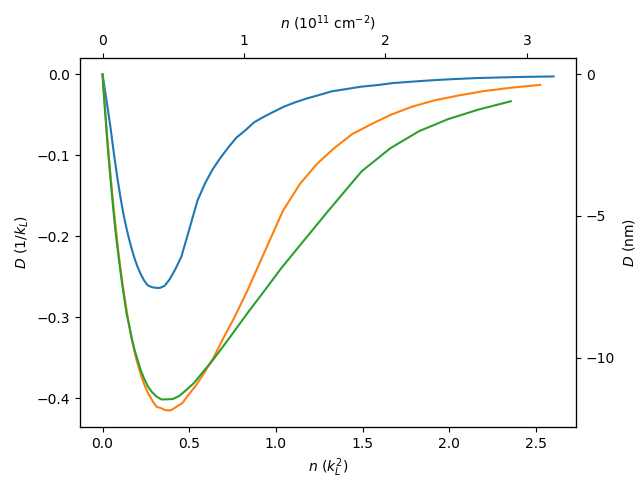

In [226]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
#     ax.plot(EFs, D * kL)
    ax.plot(ntot / kL ** 2, D * kL, '-')
    
ax.set_xlabel('$n$ ($k_L^{2}$)')
ax.set_ylabel('$D$ ($1/k_L$)')
    
axtwin = ax.twinx()
ax2 = axtwin.twiny()
ax2.set_xlim([xlim * kL**2 / 1e4 / 1e11 for xlim in ax.get_xlim()])
ax2.set_ylim([ylim / kL * 1e9 for ylim in ax.get_ylim()])

ax2.set_xticks([0, 1, 2, 3])
ax2.set_yticks([-10, -5, 0, ])
# ax2.set_xticklabels(['%.2f' %(tick * kL **2 /1e4/1e11) for tick in ax.get_xticks()])
# ax2.set_yticklabels([tick * kL for tick in ax.get_yticks()])


ax2.set_xlabel('$n$ ($10^{11}$ cm$^{-2}$)')
axtwin.set_ylabel('$D$ (nm)')

fig.subplots_adjust(right=0.9)

# Plot 2x2 bands to try to match Battilomo exactly

Berry curvature is about a factor of 2 higher in my calculations, but all the topology looks good. Derivative is also about the same factor larger, so I am probably taking the gradient correctly. How does this result in a factor of 10 larger Berry dipole in my calculations?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [12]:
%matplotlib notebook

In [15]:
Delta = 0.001
delta = w_to_delta(-EL)

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, Nkx=500, Nky=500, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM, Nkx_new=2000, Nky_new=2000)

<IPython.core.display.Javascript object>


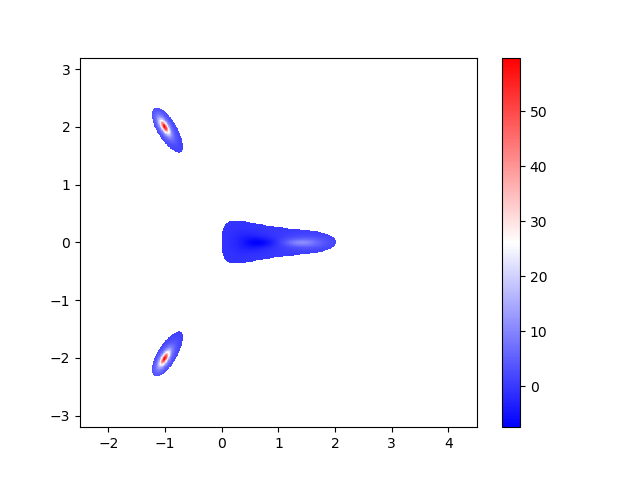

<IPython.core.display.Javascript object>


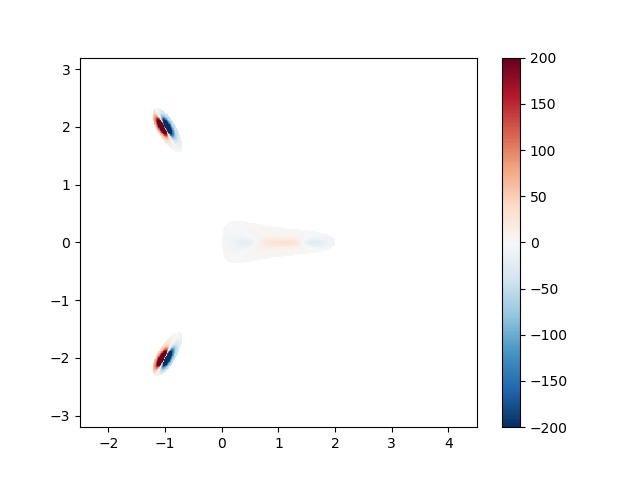

(-3.2, 3.2)

In [16]:
EF = 1.47e-3  #EL
# EF = EL+Delta/2
f = feq_func(E2[1], EF, 0)

Of = Omega2[1] * f 
om = np.ma.masked_where(E2[1] > EF, Of)

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, om.T*kL**2, cmap='bwr')#, vmin=-25, vmax=8)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, np.gradient(om, kx2, axis=0).T*kL**3, cmap='RdBu_r', vmin=-200, vmax=200)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

# Consider Berry dipole in each valley

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [5]:
wELs = np.array([1,3,5])*EL
deltas = w_to_delta(wELs)

# 2x2

In [10]:
deltas

array([0.00207292, 0.00621876, 0.0103646 ])

In [13]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)

Ds = []
ntots = []

Dps = []
ntotps = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

    # K'
    kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True, xi=-1)
    Omegap, Mup = berry_mu(Kxp, Kyp, Ep, Psip)
    splEp, splOp, splMp = get_splines(kxp, kyp, Ep, Omegap, Mup)
    kxp2, kyp2, Ep2, Omegap2, Mup2 = densify(kxp, kyp, splEp, splOp, splMp)
    
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)
    ntotp = np.empty_like(EFs)
    Dp = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
        fp = feq_func(Ep2, EF, T=T)
        ntotp[i] = n_valley(kxp2, kyp2, fp)
        Dp[i] = D_valley(kxp2, kyp2, fp, splOp)[1]
    
    
    Ds.append(D)
    ntots.append(ntot)    
    
    Dps.append(Dp)
    ntotps.append(ntotp)

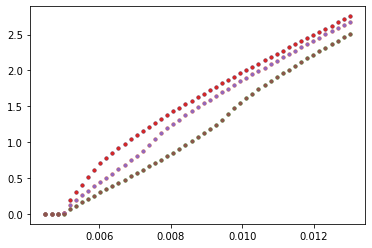

In [14]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')
    
for ntotp in ntotps:
    ax.plot(EFs, ntotp / kL**2, '.')

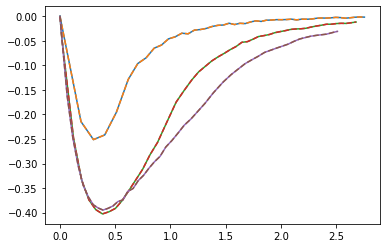

In [15]:
fig, ax = plt.subplots()

for ntot, D, ntotp, Dp in zip(ntots, Ds, ntotps, Dps):
    ax.plot(ntot / kL ** 2, D * kL)
    ax.plot(ntotp / kL ** 2, Dp * kL, '--')
#     ax.plot(ntotp / kL ** 2, (Dp+D) * kL, '--')

# Test density functions

In [2]:
kx, ky, Kx, Ky, E, Psi = get_bands(xi=1, Delta=0.01, delta=0.01, twobytwo=False)
# kx2, ky2, E2 = densify(kx, ky, splE, Nkx_new=2000, Nky_new=2000)

kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(xi=1, Delta=0.01, delta=0.01, twobytwo=False)
# kxp2, kyp2, Ep2 = densify(kx, ky, splE, Nkx_new=2000, Nky_new=2000)

In [3]:
from blg_strain.macroscopic import n_layer, n_valley, n_valley_layer, ntot_func

In [4]:
EFs = np.linspace(0.0045, 0.013, 51)


In [13]:
nl1s = np.empty_like(EFs)
nl2s = np.empty_like(EFs)
nvs = np.empty_like(EFs)
nvps = np.empty_like(EFs)
nvl1s = np.empty_like(EFs)
nvlp1s = np.empty_like(EFs)
nvl2s = np.empty_like(EFs)
nvlp2s = np.empty_like(EFs)
nts = np.empty_like(EFs)

T=0
for i, EF in enumerate(EFs):
    f = feq_func(E, EF, T=T)
    fp = feq_func(Ep, EF, T=T)
    
    nvs[i] = n_valley(kx, ky, f)
    nvps[i] = n_valley(kxp, kyp, fp)
    nvl1s[i] = n_valley_layer(kx, ky, f, Psi, layer=1)
    nvlp1s[i] = n_valley_layer(kxp, kyp, fp, Psip, layer=1)
    nvl2s[i] = n_valley_layer(kx, ky, f, Psi, layer=2)
    nvlp2s[i] = n_valley_layer(kxp, kyp, fp, Psip, layer=2)
    nl1s[i] = n_layer(kx, ky, f, fp, Psi, Psip, layer=1)
    nl2s[i] = n_layer(kx, ky, f, fp, Psi, Psip, layer=2)
    nts[i] = ntot_func(kx, ky, f, fp)

In [15]:
%matplotlib notebook

Carrier density in each valley/layer - different for each layer but same across valleys - all sum up to total

<IPython.core.display.Javascript object>


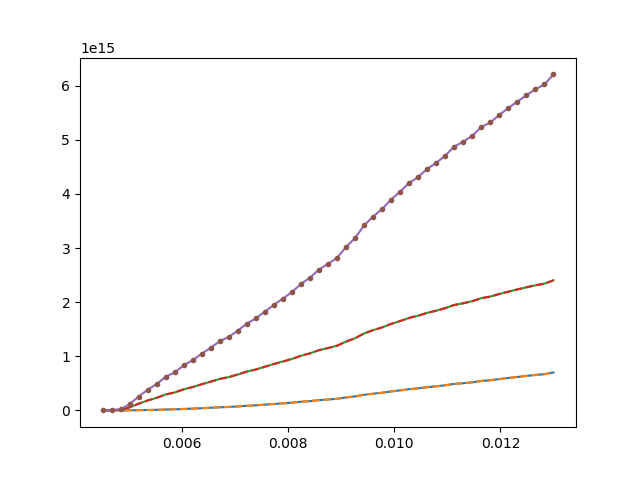

In [27]:
fig, ax = plt.subplots()

ax.plot(EFs, nvl1s, '-')
ax.plot(EFs, nvlp1s, '--')
ax.plot(EFs, nvl2s, '-')
ax.plot(EFs, nvlp2s, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nvl1s+nvl2s+nvlp1s+nvlp2s, '.')

Equal carrier density in each valley (contributions from both layers) - sum to total

<IPython.core.display.Javascript object>


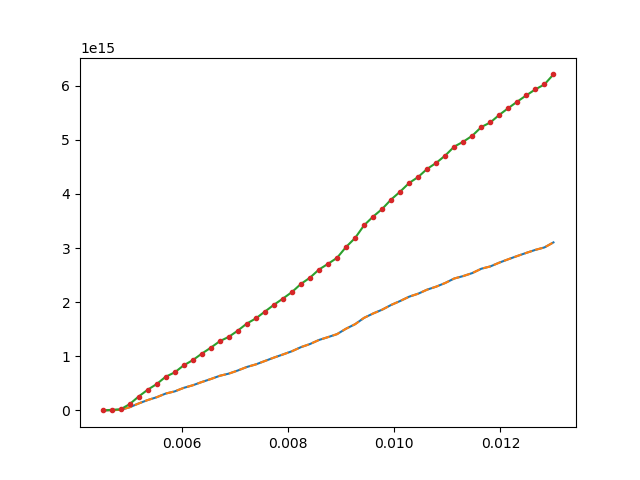

In [23]:
fig, ax = plt.subplots()

ax.plot(EFs, nvs, '-')
ax.plot(EFs, nvps, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nvs+nvps, '.')

Different carrier density in each layer (contributions from both valleys) - sum to total

<IPython.core.display.Javascript object>


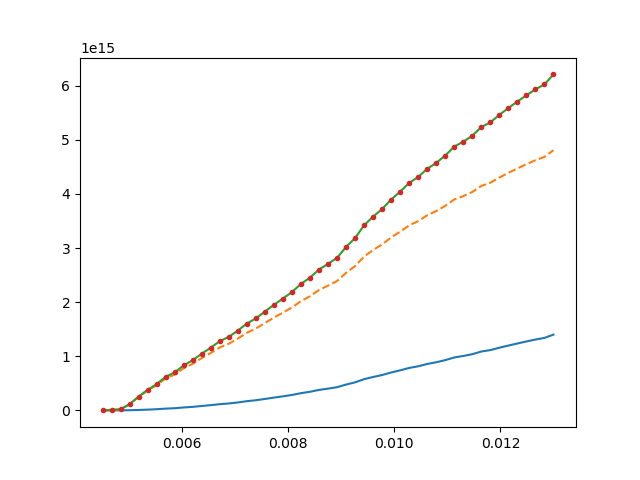

In [28]:
fig, ax = plt.subplots()

ax.plot(EFs, nl1s, '-')
ax.plot(EFs, nl2s, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nl1s+nl2s, '.')